<a href="https://colab.research.google.com/github/anantshahi/BooksRecommendationSystem/blob/master/Subject_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/anantshahi/BooksRecommendationSystem.git"

Cloning into 'BooksRecommendationSystem'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [2]:
!mv /content/BooksRecommendationSystem/BX-CSV-Dump.zip /content

In [3]:
!unzip "/content/BX-CSV-Dump.zip"

Archive:  /content/BX-CSV-Dump.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


Step1: Import all neccesary libraries

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Step2: Read all the neccesary datasets. In this case we have three datasets
    1. User Data 
    2. Books Data
    3. Ratings data

In [5]:
books = pd.read_csv("BX-Books.csv", sep = ';', error_bad_lines=False, encoding='latin-1')

ratings = pd.read_csv("BX-Book-Ratings.csv", sep = ';', error_bad_lines=False, encoding='latin-1')

users = pd.read_csv("BX-Users.csv", sep = ';', error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:27

Step3: Exploring and viewing our data sets

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

Changing column names for convenieance 

In [8]:
books.columns=['ISBN','Subject_Title','Student_Name','yearOfClass','Facilitator','imageUrl_S','imageUrl_M','imageUrl_L']

In [9]:
books.columns

Index(['ISBN', 'Subject_Title', 'Student_Name', 'yearOfClass', 'Facilitator',
       'imageUrl_S', 'imageUrl_M', 'imageUrl_L'],
      dtype='object')

In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
ratings.columns = ['userID', 'ISBN', 'Course_Rating']

In [12]:
ratings.columns

Index(['userID', 'ISBN', 'Course_Rating'], dtype='object')

In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
users.columns=['userID','location','age']

In [15]:
users.columns

Index(['userID', 'location', 'age'], dtype='object')

Step4: Exploring shapes of our datasets

In [16]:
books.shape   #Two Lakhs seventy one thousand three hundred sixty records

(271360, 8)

In [17]:
users.shape    # Two Lakhs seventy eight thousand eight hundred fifty eight records 

(278858, 3)

In [18]:
ratings.shape    #Eleven lakhs forty nine thousand seven hundred eighty records 

(1149780, 3)

Step5: We wil plot graphs to get the better idea of data distribution 
    1. Bar graph for ratings 
    2. Histogram graph for users age range 

Bar Graph

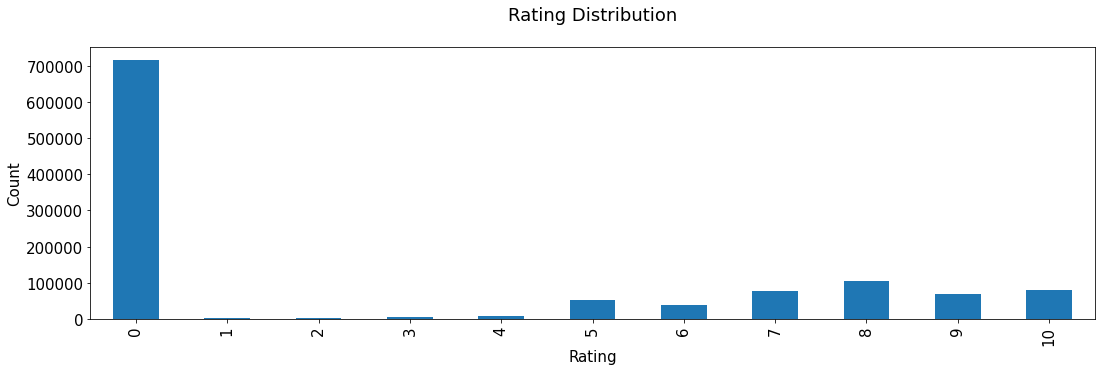

In [19]:
plt.rc("font", size=15)
plt.figure(figsize=(18,5), frameon=False)

ratings.Course_Rating.value_counts(sort=False).plot(kind='bar')

plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')


plt.show()

Histogram 

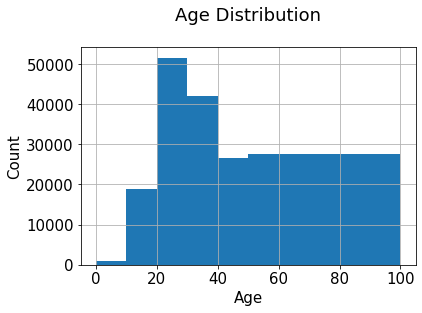

In [20]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Step6: Recommendation based on Ratings

In [21]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['Course_Rating'].count())
rating_count.sort_values('Course_Rating', ascending=False).head()

,Course_Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


Let us see which are those top 5 books by user ratings 

In [24]:
most_rated_courses = pd.DataFrame(['0971880107','0316666343','0385504209','0060928336','0312195516'],index=np.arange(5),columns = ['ISBN'])

most_rated_courses_summary = pd.merge(most_rated_courses,books,on='ISBN')

most_rated_courses_summary

,ISBN,Subject_Title,Student_Name,yearOfClass,Facilitator,imageUrl_S,imageUrl_M,imageUrl_L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


Recommendation based on corelations

In [25]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Course_Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Course_Rating'].count())

average_rating.sort_values('ratingCount', ascending=False).head()

,Course_Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


# To ensure statistical significance, we will be considering only those courses which have rating count larger than 100 and users with more than 200 ratings

In [26]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['Course_Rating'].value_counts()
ratings = ratings[ratings['Course_Rating'].isin(counts[counts >= 100].index)]


# Recommendation using collabrative filtering using k-NN

We will be merging books and ratings dataset and will be making a new data set for further use just for our ease

In [27]:
combine_courses_rating = pd.merge(ratings,books, on='ISBN')


columns  =['yearOfClass','Facilitator','imageUrl_S','imageUrl_M','imageUrl_L']

combine_courses_rating = combine_courses_rating.drop(columns,axis=1)

combine_courses_rating.head()

,userID,ISBN,Course_Rating,Subject_Title,Student_Name
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner


We will clean combine_courses_rating by dropping NaN vals including subset(column) Subject_Title

In [29]:
combine_courses_rating = combine_courses_rating.dropna(axis=0,subset=['Subject_Title'])

We will resturucture combine_courses_rating into course_rating_count for better analysis and output

> Indented block



In [30]:
course_rating_count = (combine_courses_rating.
                     groupby(by=['Subject_Title'])['Course_Rating'].
                     count().
                     reset_index().
                     rename(columns = {'Course_Rating': 'totalRatingCount'})
                     [['Subject_Title','totalRatingCount']]
                    )
course_rating_count.head()

,Subject_Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [31]:
rating_with_totalRatingCount = combine_courses_rating.merge(course_rating_count,left_on='Subject_Title', right_on='Subject_Title', how='left')

rating_with_totalRatingCount.head()

,userID,ISBN,Course_Rating,Subject_Title,Student_Name,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82


In order to maximise efficiency of our model, we wil define a popularity threshold. 

In [32]:
popularity_threshold = 50

rating_popular_course = rating_with_totalRatingCount.query('totalRatingCount>= @popularity_threshold')

rating_popular_course.head()

,userID,ISBN,Course_Rating,Subject_Title,Student_Name,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82


In [33]:
rating_popular_course.shape

(62149, 6)

We will merge user data set along with rating_popular_book in order to get complete information

In [34]:
combined_ratings_with_users = rating_popular_course.merge(users, right_on ='userID', left_on ='userID', how='left')
combined_ratings_with_users = combined_ratings_with_users.drop('age', axis = 1)

combined_ratings_with_users.head()


,userID,ISBN,Course_Rating,Subject_Title,Student_Name,totalRatingCount,location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82,"knoxville, tennessee, usa"
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82,"n/a, n/a, n/a"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,82,"cordova, tennessee, usa"


# Implementing kNN model with cosine similarity

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [36]:
from scipy.sparse import csr_matrix

#We will be dropping duplicates in order to make it efficient from both bookTitle and userID

combined_ratings_with_users = combined_ratings_with_users.drop_duplicates(['userID','Subject_Title'])

#This setp is important as we will be creating pivot table for the final dataframe 

combined_ratings_with_users_pivot = combined_ratings_with_users.pivot(index='Subject_Title', columns='userID', values ='Course_Rating').fillna(0)

combined_ratings_with_users_matrix = csr_matrix(combined_ratings_with_users_pivot.values)


#We will be training our data by fitting it into nearest neighbour

from sklearn.neighbors import NearestNeighbors

model_knn  = NearestNeighbors(metric='cosine', algorithm='brute')

model_knn.fit(combined_ratings_with_users_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

This is the part where we will be randomly picking a book from the dataset. We will store it into query_index. Thats where user input wil go

In [44]:
query_index = np.random.choice(combined_ratings_with_users_pivot.shape[0])
print(query_index)

distances,indices  = model_knn.kneighbors(combined_ratings_with_users_pivot.iloc[query_index,:].values.reshape(1,-1),
                                         n_neighbors=6)



404


In [45]:
combined_ratings_with_users_pivot.index[query_index]

'Pride and Prejudice'

In [46]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(combined_ratings_with_users_pivot.index[query_index]))
    else:
        a = combined_ratings_with_users_pivot.index[indices.flatten()[i]]
        student  = combined_ratings_with_users.loc[combined_ratings_with_users['Subject_Title']==a,'Student_Name'].iloc[0]
        print('{0}: {1}, Student_Name: {2}'.format(i,combined_ratings_with_users_pivot.index[indices.flatten()[i]], student))

Recommendations for Pride and Prejudice:

1: The English Patient, Student_Name: Michael Ondaatje
2: How to Be Good, Student_Name: Nick Hornby
3: Rising Sun, Student_Name: MICHAEL CRICHTON
4: Sleepers, Student_Name: Lorenzo Carcaterra
5: The Color Purple, Student_Name: Alice Walker
